In [1]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import string
import re
from collections import Counter
import matplotlib.pyplot as plt


In [371]:
text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""

In [372]:
#  "nlp" Object is used to create documents with linguistic annotations.
my_doc=nlp(text)

In [376]:
for token in my_doc:
    print(token.text,token.pos_)

When ADV
learning VERB
data NOUN
science NOUN
, PUNCT
you PRON
should AUX
n't ADV
get VERB
discouraged VERB
! PUNCT

 SPACE
Challenges NOUN
and CCONJ
setbacks NOUN
are VERB
n't ADV
failures NOUN
, PUNCT
they PRON
're VERB
just ADV
part NOUN
of ADP
the DET
journey NOUN
. PUNCT
You PRON
've VERB
got VERB
this DET
! PUNCT


In [4]:
# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)
print(token_list)

['When', 'learning', 'data', 'science', ',', 'you', 'should', "n't", 'get', 'discouraged', '!', '\n', 'Challenges', 'and', 'setbacks', 'are', "n't", 'failures', ',', 'they', "'re", 'just', 'part', 'of', 'the', 'journey', '.', 'You', "'ve", 'got', 'this', '!']


In [5]:
# Stop words
from spacy.lang.en.stop_words import STOP_WORDS
# importing stop words from English language.
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

In [3]:
#Printing the total number of stop words:
print('Number of stop words: %d' % len(spacy_stopwords))

Number of stop words: 326


In [4]:
#Printing first ten stop words:
print('First ten stop words: %s' % list(spacy_stopwords)[:20])

First ten stop words: ['‘ll', 'for', 'quite', 'wherein', 'after', 'keep', 'above', 'moreover', 'please', 'herself', 'onto', 'has', 'none', 'him', 'regarding', 'it', 'hers', 'together', 'amount', 'well']


In [12]:


#Implementation of stop words:
filtered_sent=[]

#  "nlp" Object is used to create documents with linguistic annotations.
doc = nlp(text)

In [13]:
# filtering stop words
for word in doc:
    if word.is_stop==False:
        filtered_sent.append(word)
print("Filtered Sentence:",filtered_sent)

Filtered Sentence: [learning, data, science, ,, discouraged, !, 
, Challenges, setbacks, failures, ,, journey, ., got, !]


In [274]:
# Implementing lemmatization
lem = nlp("america american americans")
# finding lemma for each word
for word in lem:
    print(word.text, word.lemma_)

america america
american american
americans american


In [17]:
# POS tagging

#  "nlp" Objectis used to create documents with linguistic annotations.
docs = nlp(u"All is well that ends well.")

for word in docs:
    print(word.text,word.pos_)

All DET
is VERB
well ADV
that DET
ends VERB
well ADV
. PUNCT


In [8]:
# for visualization of Entity detection importing displacy from spacy:

from spacy import displacy

nytimes = nlp(u"""New York City on Tuesday declared a public health emergency and ordered mandatory measles vaccinations amid an outbreak, becoming the latest national flash point over refusals to inoculate against dangerous diseases.

At least 285 people have contracted measles in the city since September, mostly in Brooklyn’s Williamsburg neighborhood. The order covers four Zip codes there, Mayor Bill de Blasio (D) said Tuesday.

The mandate orders all unvaccinated people in the area, including a concentration of Orthodox Jews, to receive inoculations, including for children as young as 6 months old. Anyone who resists could be fined up to $1,000.""")

entities = [(i, i.label_,spacy.explain(i.label_)) for i in nytimes.ents]
entities

[(New York City, 'GPE', 'Countries, cities, states'),
 (Tuesday, 'DATE', 'Absolute or relative dates or periods'),
 (At least 285, 'CARDINAL', 'Numerals that do not fall under another type'),
 (September, 'DATE', 'Absolute or relative dates or periods'),
 (Brooklyn, 'GPE', 'Countries, cities, states'),
 (Williamsburg, 'GPE', 'Countries, cities, states'),
 (four, 'CARDINAL', 'Numerals that do not fall under another type'),
 (Bill de Blasio, 'PERSON', 'People, including fictional'),
 (Tuesday, 'DATE', 'Absolute or relative dates or periods'),
 (Orthodox Jews, 'NORP', 'Nationalities or religious or political groups'),
 (6 months old, 'DATE', 'Absolute or relative dates or periods'),
 (up to $1,000, 'MONEY', 'Monetary values, including unit')]

In [19]:
displacy.render(nytimes, style = "ent",jupyter = True)

In [12]:
# Depenency parsing is a language processing technique that allows us to better determine 
# the meaning of a sentence by analyzing how it’s constructed to determine how the 
# individual words relate to each other.

docp = nlp(" In pursuit of a wall, President Trump ran into one.")

for chunk in docp.noun_chunks:
    print(chunk.text)

pursuit
a wall
President Trump


In [21]:
displacy.render(docp, style="dep", jupyter= True)

In [22]:
# Word Vector Representation
# A word vector is a numeric representation of a word that commuicates its relationship to other words.

mango = nlp(u'mango')
print(mango.vector.shape)
print(mango.vector)

(96,)
[ 1.0466383  -1.5323697  -0.72177905 -2.4700649  -0.2715162   1.1589639
  1.7113379  -0.31615403 -2.0978343   1.837553    1.4681302   2.728043
 -2.3457408  -5.17184    -4.6110015  -0.21236466 -0.3029521   4.220028
 -0.6813917   2.4016762  -1.9546705  -0.85086954  1.2456163   1.5107994
  0.4684736   3.1612053   0.15542296  2.0598564   3.780035    4.6110964
  0.6375268  -1.078107   -0.96647096 -1.3939928  -0.56914186  0.51434743
  2.3150034  -0.93199825 -2.7970662  -0.8540115  -3.4250052   4.2857723
  2.5058174  -2.2150877   0.7860181   3.496335   -0.62606215 -2.0213525
 -4.47421     1.6821622  -6.0789204   0.22800982 -0.36950028 -4.5340714
 -1.7978683  -2.080299    4.125556    3.1852438  -3.286446    1.0892276
  1.017115    1.2736416  -0.10613725  3.5102775   1.1902348   0.05483437
 -0.06298041  0.8280688   0.05514218  0.94817173 -0.49377063  1.1512338
 -0.81374085 -1.6104267   1.8233354  -2.278403   -2.1321895   0.3029334
 -1.4510616  -1.0584296  -3.5698352  -0.13046083 -0.266833

In [17]:
# Text Classification
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [44]:
# Loading TSV file
df_amazon = pd.read_csv ("amazon_alexa.tsv", sep="\t")

In [45]:
# Top 5 records
df_amazon.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [46]:
# shape of dataframe
df_amazon.shape

(3150, 5)

In [47]:
# View data information
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.1+ KB


In [48]:
# Feedback Value count
df_amazon.feedback.value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [ ]:
# Tokening the Data 

In [14]:
import string
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

# Create our list of punctuation marks
punctuations = string.punctuation
nlp.Defaults.stop_words |= {'four more years','[laughter','audience members','applause','president', 'the president', 'laughter'}

punctuations=punctuations+'—'+'–'

In [21]:
# Create our list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [15]:
# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

In [43]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [word.lemma_.lower().strip() if word.lemma_ !=
                "-PRON-" else word.lower_ for word in mytokens]

    # Removing stop words
    mytokens = [word for word in mytokens if word not in stop_words]
    
    #Removing punctuations
    mytokens = [word for word in mytokens if word not in punctuations]

    mytokens = ' '.join(mytokens)
    # return preprocessed list of tokens
    return mytokens

In [ ]:
# Defining a Custom Transformer

To further clean our text data, we’ll also want to create a custom transformer for removing initial and end spaces and converting text into lower case. Here, we will create a custom predictors class wich inherits the TransformerMixin class. This class overrides the transform, fit and get_parrams methods. We’ll also create a clean_text() function that removes spaces and converts text into lowercase.

In [55]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

Vectorization Feature Engineering (TF-IDF)

One tool we can use for doing this is called Bag of Words. BoW converts text into the matrix of occurrence of words within a given document. It focuses on whether given words occurred or not in the document, and it generates a matrix that we might see referred to as a BoW matrix or a document term matrix.

We can generate a BoW matrix for our text data by using scikit-learn‘s CountVectorizer. In the code below, we’re telling CountVectorizer to use the custom spacy_tokenizer function we built as its tokenizer, and defining the ngram range we want.

In [56]:
# BoW converts text into the matrix of occurrence of words within a given document. 
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [57]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [58]:
from sklearn.model_selection import train_test_split

X = df_amazon['verified_reviews'] # the features we want to analyze
ylabels = df_amazon['feedback'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

Creating a Pipeline and Generating the Model


In [59]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

/anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('cleaner', <__main__.predictors object at 0x11a8da748>), ('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

Evaluating the Model


In [60]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.9365079365079365
Logistic Regression Precision: 0.9399563318777293
Logistic Regression Recall: 0.9942263279445728


In [354]:
import string
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

# Create our list of punctuation marks
punctuations = string.punctuation
punctuations=punctuations+'—'+'–'+'--'

In [356]:
# Create our list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS


In [389]:
nlp.Defaults.stop_words |= {'four more years','[laughter','audience members','applause','president', 'the president', 'laughter','applause','[applause','[booing','clinton','[cheers'}


In [341]:
# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

In [342]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [word.lemma_.lower().strip() if word.lemma_ !=
                "-PRON-" else word.lower_ for word in mytokens]

    # Removing stop words
    mytokens = [word for word in mytokens if word not in stop_words]

    # Removing punctuations
    mytokens = [word for word in mytokens if word not in punctuations]

    mytokens = ' '.join(mytokens)
    # return preprocessed list of tokens
    return mytokens

In [295]:
campaign_speeches=pd.read_csv('Campaign Speeches')

In [347]:
campaign_speeches.head()

,candidate,date,speech title,text,party,won_nomination
0,Robert Dole,1995-04-10,Remarks Announcing Candidacy for the Republica...,"Thank you, Governor Graves, Senator Kassebaum....",Republican,1
1,Robert Dole,1995-05-31,"Remarks in Los Angeles: ""Hollywood Speech""",I want to talk about a specific matter tonight...,Republican,1
2,Robert Dole,1995-06-17,Remarks to the United States Conference of May...,"Thank you, Senator Kempthorne, and thank you a...",Republican,1
3,Robert Dole,1995-08-19,Remarks at the Iowa Straw Poll in Ames,"Thank you, Dan Quayle , for that great introdu...",Republican,1
4,Robert Dole,1995-09-04,Remarks at the American Legion Convention in I...,"Thank you, and thank you very much, Commander ...",Republican,1


In [349]:
campaign_speeches.shape

(1692, 6)

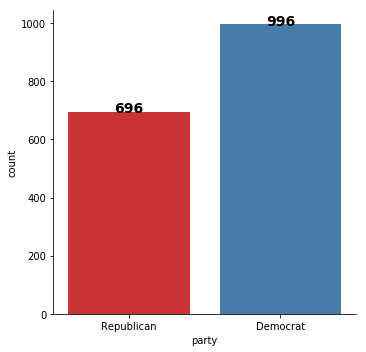

In [350]:
plot = sns.catplot(x="party", kind="count", data=campaign_speeches,palette='Set1')

for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i,  # bar index (x coordinate of text)
        h+10,  # y coordinate of text
        '{}'.format(int(h)),  # y label
        ha='center',
        va='center',
        fontweight='bold',
        size=14)

In [352]:
campaign_speeches.won_nomination.value_counts()

1    1120
0     572
Name: won_nomination, dtype: int64

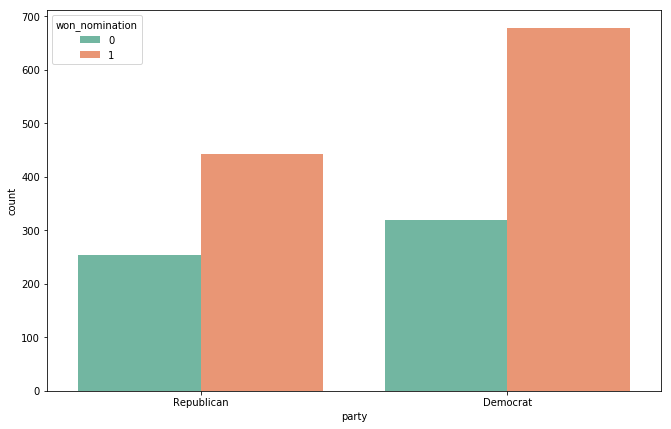

In [351]:
plt.figure(figsize=(11,7))
sns.countplot(x='party',hue='won_nomination',data=campaign_speeches,palette="Set2")

In [391]:
def candidate_eda(candidate, pos, n):

    candidate_speeches = campaign_speeches[(
        campaign_speeches.candidate == candidate)].reset_index(drop=True)

    candidate_speeches['tokenized_text'] = candidate_speeches.text.apply(
        lambda x: spacy_tokenizer(x))

    candidate_tokenized_text = [
        text for text in candidate_speeches['tokenized_text']]

    candidate_tokenized_text = ' '.join(candidate_tokenized_text).split()

    candidate_counts = Counter(candidate_tokenized_text)

    candidate_common_words = [word[0]
                              for word in candidate_counts.most_common(n)]

    candidate_common_counts = [word[1]
                               for word in candidate_counts.most_common(n)]

    print(candidate_counts.most_common(n))
    fig1 = plt.figure(figsize=(18, 6))
    sns.barplot(x=candidate_common_words, y=candidate_common_counts)
    plt.title("Most Common Words used in the {}'s Speeches".format(candidate))
    plt.xticks(rotation=45, fontsize=12)
    plt.show()

    nlp.max_length = 10000000
    candidate_text = [text for text in candidate_speeches.text]
    candidate_text = ' '.join(candidate_text).strip()

    candidate_nlp = nlp(candidate_text)
    candidate_ents = candidate_nlp.ents

    entities = []
    # named entities
    for ent in candidate_ents:
        # Print the entity text and its label
        if ent.label_ == 'GPE' or ent.label_ == 'PERSON' or ent.label_ == 'LOC' or ent.label_ == 'ORG' or ent.label_ == 'EVENT':
            entities.append(str(ent))

    entities = [word for word in entities if word.lower() not in stop_words]

    counter = Counter(entities)
    result = counter.most_common(n)

    print("top {} entities {}".format(n, result))
    fig2 = plt.figure(figsize=(12, 18))

    sns.barplot([i[1] for i in result], ["\"{}\"".format(i[0])
                                         for i in result])
    plt.ylabel('named entity')
    plt.xlabel('total')
    plt.xticks(rotation='horizontal', fontsize=10)
    plt.title("Top {} named entities".format(n))
    plt.subplots_adjust(bottom=0.40)
    plt.show()

    phrases = [np.text for np in candidate_nlp.noun_chunks if len(np)>2]
    phrases = [word for word in phrases if word.lower() not in stop_words]

    counter1 = Counter(phrases)
    result1 = (counter1.most_common(n))

    fig3 = plt.figure(figsize=(12, 18))
    sns.barplot([i[1] for i in result1], ["\"{}\"".format(i[0])
                                          for i in result1])
    plt.ylabel('phrase')
    plt.xlabel('total')
    plt.xticks(rotation='horizontal', fontsize=10)
    plt.title("Top {} named phrases".format(n))
    plt.subplots_adjust(bottom=0.40)
    plt.show()

    positions=[]
    for token in candidate_nlp:
        # ignore stop words
        
        if token.pos_ == pos:
            positions.append(token.text)
    
    positions= [word for word in positions if word.lower() not in stop_words]
    # sort by values, but before get only those keys where value > 1;
    # I want lemmas that appear more than one lastly, get the first n results
    counter2 = Counter(positions)
    result2 = (counter2.most_common(n))

    print("top {} {} {}".format(n,pos, result2))
    fig4 = plt.figure(figsize=(18, 6))
    sns.barplot(["\"{}\"".format(i[0])
                 for i in result2], [i[1] for i in result2])
    plt.title("Top {}s used in {}'s Speeches".format(pos, candidate))
    plt.ylabel('total')
    plt.xlabel('term')
    plt.xticks(rotation=45, fontsize=12)
    plt.show()

[('work', 5788), ('people', 5709), ('american', 5382), ('know', 5091), ('want', 4797), ('year', 4758), ('america', 4624), ('job', 4401), ('country', 4400), ('need', 4065), ('time', 3933), ('think', 3687), ('right', 3262), ('good', 3245), ('come', 3220), ('change', 3069), ('new', 2952), ('tax', 2781), ('like', 2706), ('sure', 2642), ('believe', 2620), ('help', 2569), ('pay', 2476), ('thing', 2456), ('economy', 2403)]


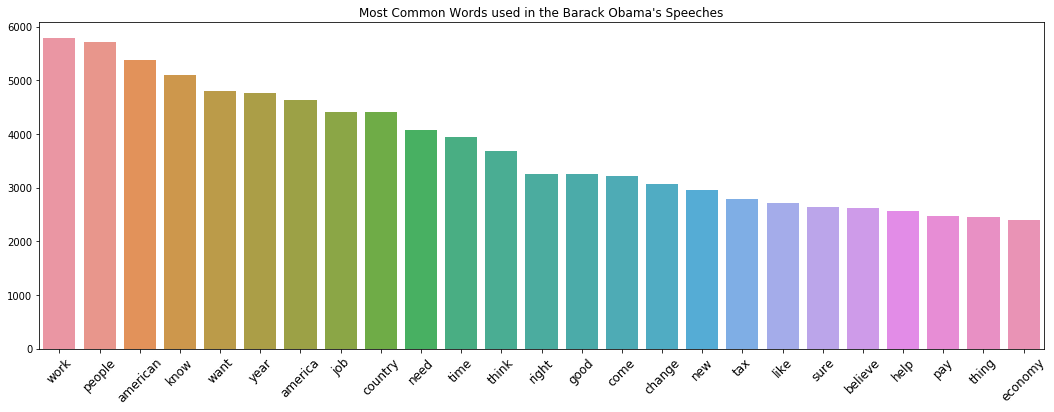

top 25 entities [('America', 3708), ('Washington', 1332), ('Iraq', 1227), ('the United States of America', 791), ('the United States', 750), ('Congress', 741), ('Romney', 678), ('McCain', 551), ('Afghanistan', 525), ('John McCain', 482), ('Ohio', 448), ('Michelle', 392), ('Medicare', 379), ('Iowa', 373), ('Earth', 335), ('Bush', 329), ('Chicago', 303), ('Obama', 263), ('Iran', 255), ('Florida', 253), ('China', 247), ('Israel', 233), ('State', 228), ('Senate', 225), ('Bill Clinton', 216)]


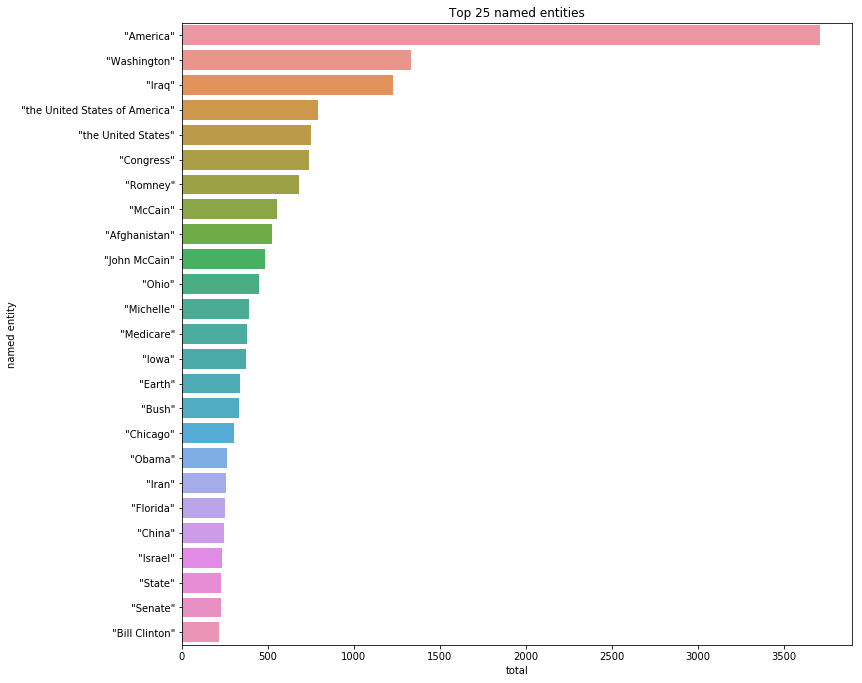

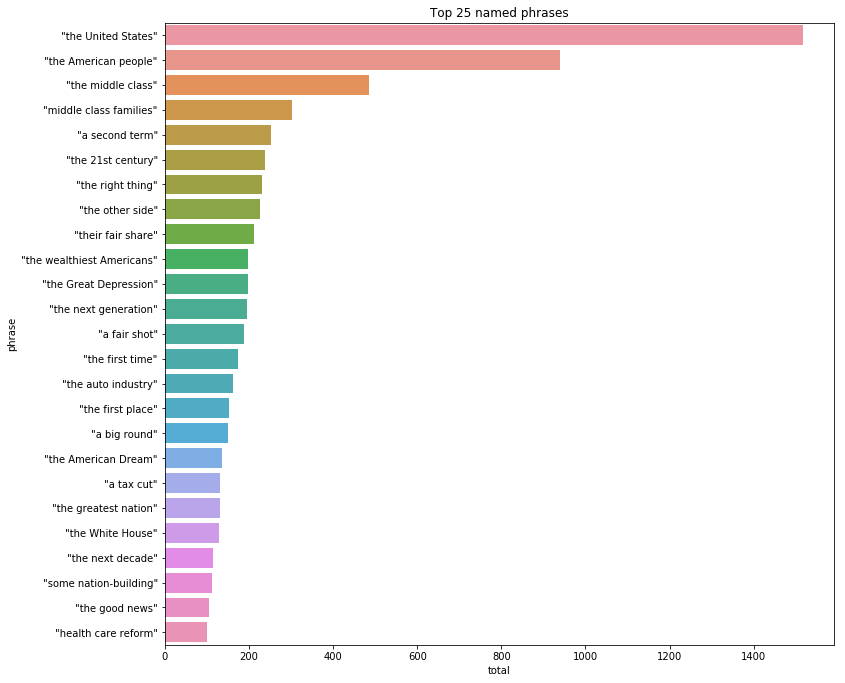

top 25 NOUN [('people', 5542), ('country', 4126), ('years', 3554), ('time', 3303), ('jobs', 3130), ('tax', 2555), ('economy', 2383), ('health', 2140), ('everybody', 2010), ('way', 1982), ('care', 1979), ('world', 1911), ('work', 1885), ('folks', 1877), ('plan', 1873), ('change', 1743), ('election', 1650), ('class', 1625), ('energy', 1532), ('families', 1489), ('war', 1416), ('education', 1409), ('lot', 1407), ('college', 1397), ('things', 1325)]


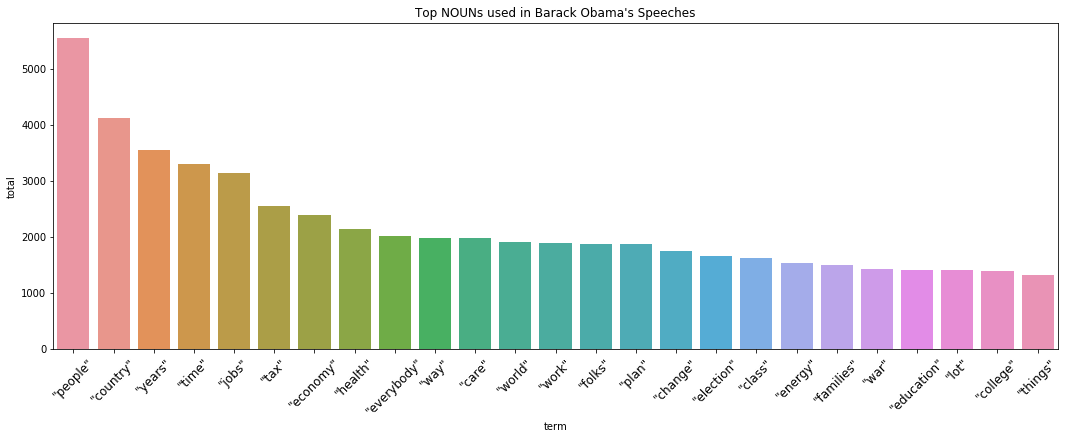

In [394]:
candidate_eda('Barack Obama','NOUN',25)

[('people', 1455), ('country', 1415), ('american', 1318), ('hillary', 1083), ('job', 1024), ('know', 841), ('want', 801), ('great', 797), ('america', 717), ('new', 592), ('like', 559), ('year', 548), ('time', 524), ('right', 500), ('trump', 461), ('come', 451), ('work', 435), ('think', 435), ('happen', 415), ('deal', 410), ('world', 409), ('state', 407), ('good', 398), ('look', 389), ('win', 385)]


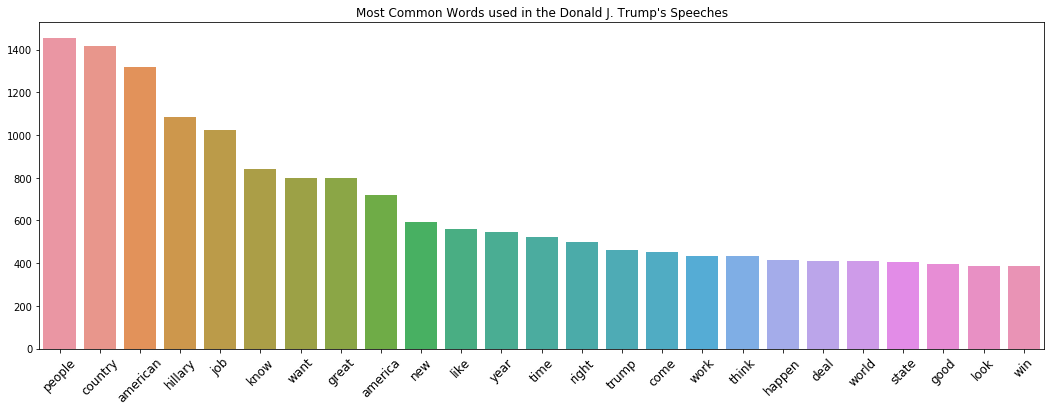

top 25 entities [('Hillary Clinton', 664), ('America', 524), ('Hillary', 296), ('the United States', 267), ('ISIS', 197), ('Obama', 196), ('China', 187), ('Donald Trump', 169), ('Mexico', 165), ('Obamacare', 162), ('Trump', 156), ('NAFTA', 132), ('Washington', 114), ('Iran', 103), ("Hillary Clinton's", 103), ('Congress', 99), ('FBI', 97), ('Iraq', 94), ('Russia', 88), ('the Middle East', 83), ('State', 79), ('Michigan', 76), ('Syria', 70), ('Pennsylvania', 65), ('Trump Administration', 65)]


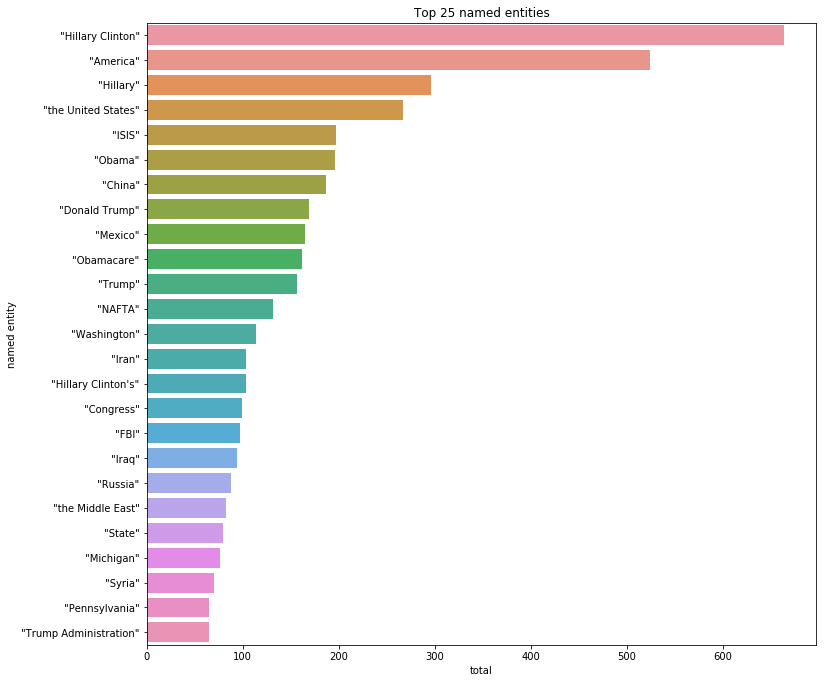

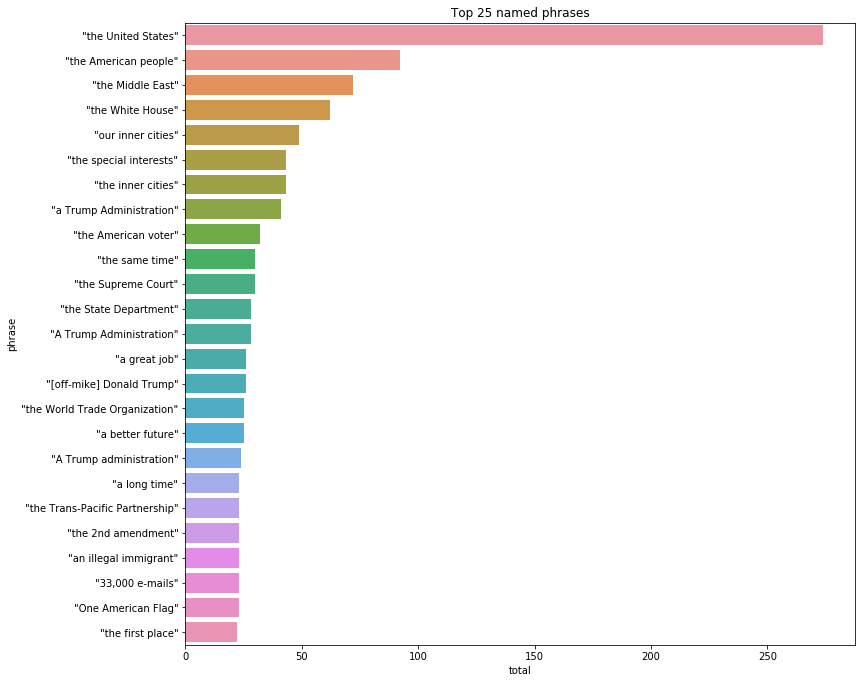

top 25 NOUN [('people', 1356), ('country', 1196), ('jobs', 794), ('time', 417), ('world', 335), ('years', 334), ('government', 320), ('way', 316), ('trade', 305), ('percent', 290), ('money', 276), ('plan', 267), ('nation', 253), ('deal', 227), ('job', 227), ('tax', 221), ('things', 220), ('system', 219), ('countries', 216), ('year', 214), ('immigration', 206), ('state', 184), ('law', 184), ('lot', 183), ('day', 182)]


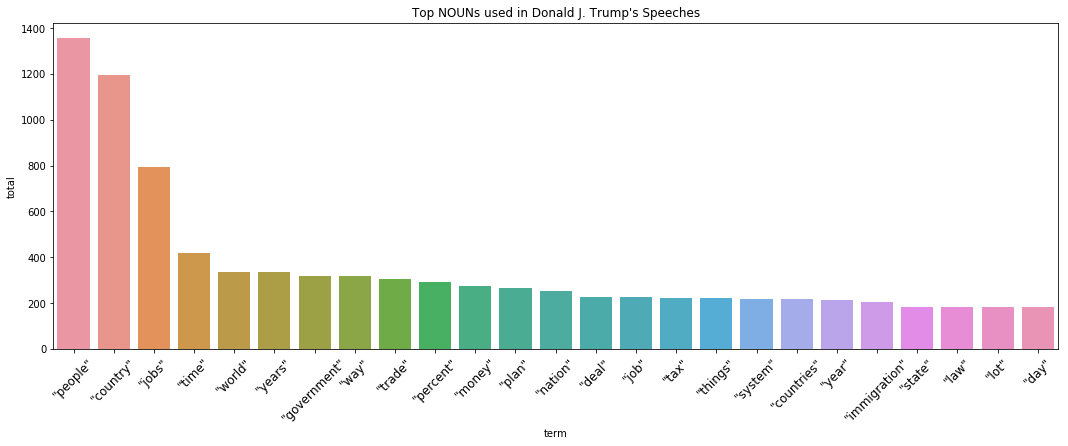

In [392]:
candidate_eda('Donald J. Trump','NOUN',25)

[('know', 3701), ('people', 3514), ('work', 2820), ('think', 2492), ('want', 2468), ('need', 1810), ('american', 1743), ('country', 1661), ('year', 1623), ('america', 1580), ('right', 1526), ('family', 1430), ('good', 1416), ('new', 1415), ('time', 1378), ('care', 1367), ('like', 1272), ('come', 1263), ('job', 1196), ('believe', 1166), ('help', 1150), ('lot', 1115), ('thank', 1034), ('health', 1033), ('child', 1004)]


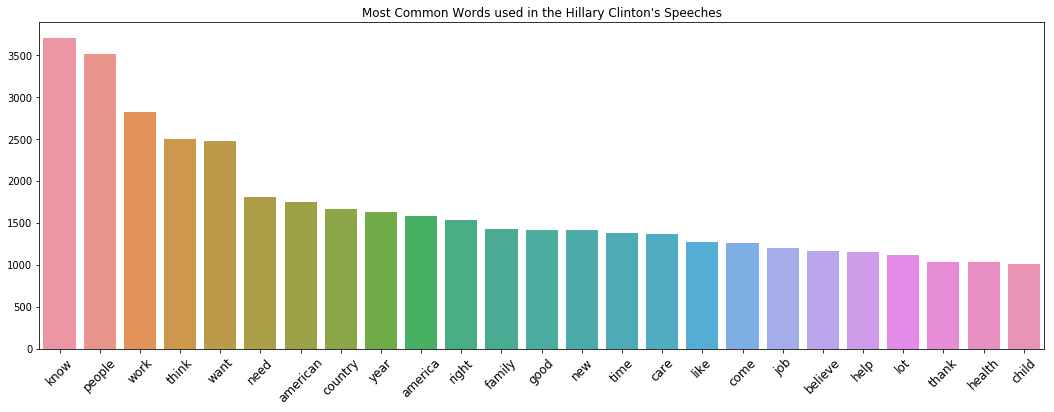

top 25 entities [('America', 1518), ('Iraq', 393), ('Obama', 361), ('the United States', 247), ('New York', 244), ('Iran', 243), ('Donald Trump', 240), ('Congress', 230), ('Iowa', 214), ('New Hampshire', 214), ('Bush', 210), ('Senate', 178), ('Ohio', 174), ('the White House', 164), ('Israel', 159), ('ISIS', 157), ('Florida', 138), ('China', 119), ('Sanders', 114), ('McCain', 113), ('Washington', 109), ('Hillary Clinton', 105), ('Michigan', 104), ('Pennsylvania', 90), ('Social Security', 88)]


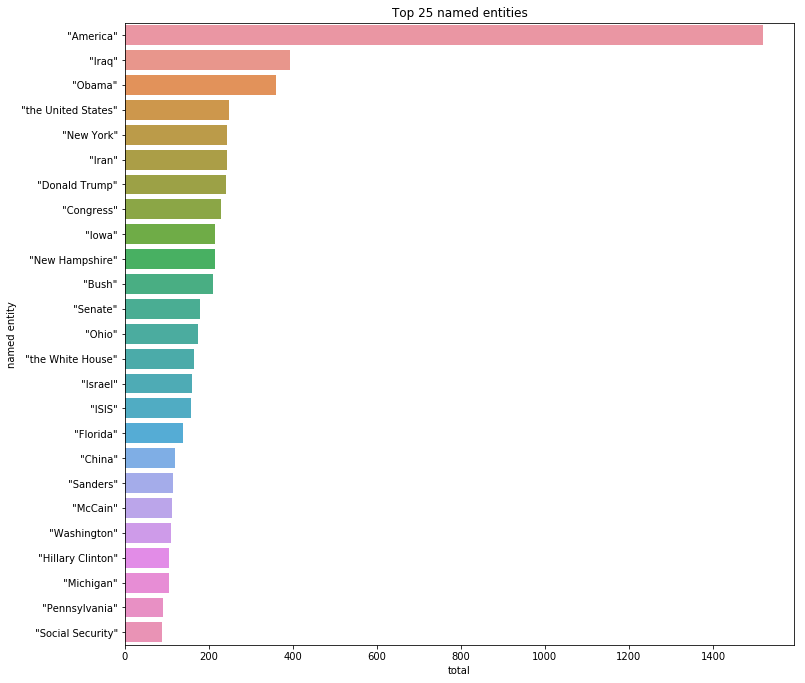

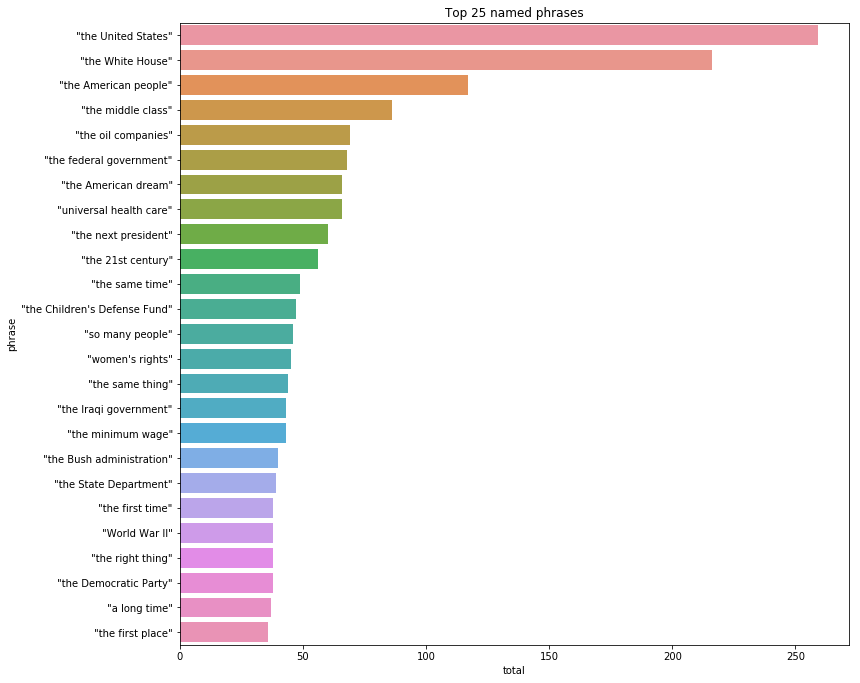

top 25 NOUN [('people', 3384), ('country', 1384), ('time', 1200), ('years', 1130), ('care', 1083), ('lot', 1072), ('health', 951), ('families', 849), ('way', 813), ('world', 803), ('jobs', 787), ('work', 713), ('campaign', 695), ('economy', 680), ('women', 674), ('children', 672), ('government', 640), ('today', 626), ('day', 622), ('family', 565), ('energy', 487), ('year', 486), ('school', 478), ('life', 477), ('election', 464)]


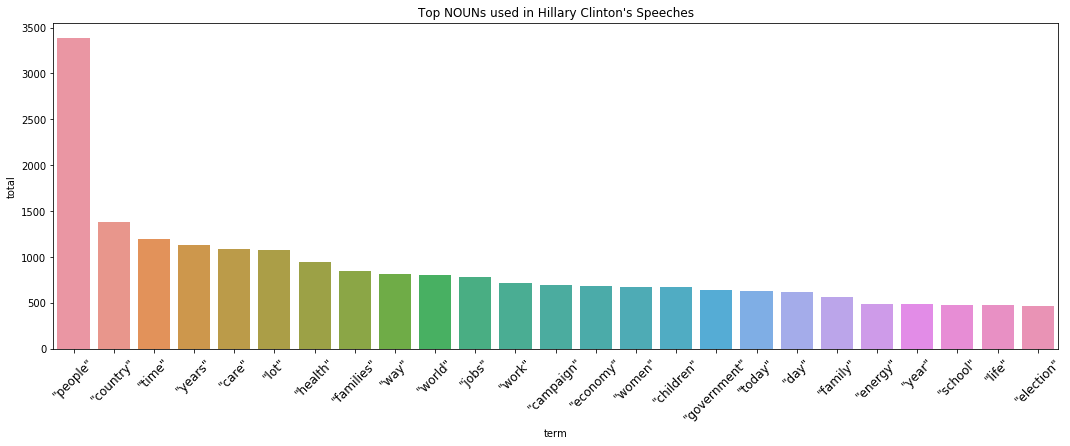

In [393]:
candidate_eda('Hillary Clinton','NOUN',25)